In [1]:
'''
Explore the following method or something like it for solving 2gen:

1. Solve non-e-slice in bottom and a "DR pair" together (any piece, top/bottom color on bottom and e-slice in e-slice)
2. Set up the next DR pair, ready to insert it with R U' R (or R' U R, or potentially other cases)
3. Solve pair while orienting all corners (27 algs for each case)
4. Solve D corners in D layer using <U,R2>, potentially also with e-slice solved (usually adds 2 moves)
5. Solve the rest with 1 alg (17-20 algs?)

'''

'\nExplore the following method or something like it for solving 2gen:\n\n1. Solve non-e-slice in bottom and a "DR pair" together (any piece, top/bottom color on bottom and e-slice in e-slice)\n2. Set up the next DR pair, ready to insert it with R U\' R (or R\' U R, or potentially other cases)\n3. Solve pair while orienting all corners (27 algs for each case)\n4. Solve D corners in D layer using <U,R2>, potentially also with e-slice solved (usually adds 2 moves)\n5. Solve the rest with 1 alg (17-20 algs?)\n\n'

Support algs imported!
0.07528471946716309


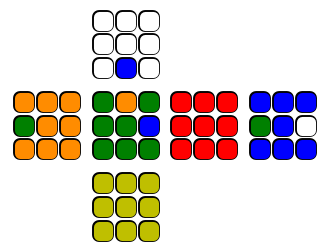

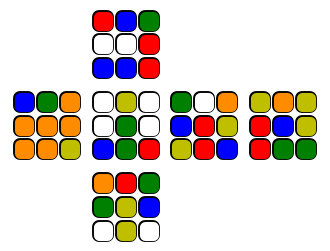

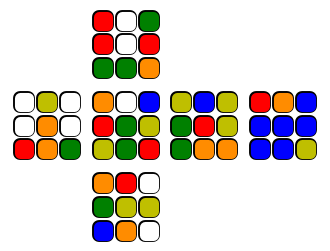

Cube initiated


In [2]:
%run "2gen optimal solver.ipynb"

In [3]:
cube = Cube()
scr = ""
for k in range(200):
    scr += random.choice(moveset)+" "
scr = scr.strip()
cube.apply_moves(scr)
sol = solver_2gen(cube)
print(len(sol.split(" ")),sol)

16 R' U2 R' U R' U R U' R' U R' U R U2 R' U2


In [4]:
cube = Cube(1)
cube

@njit
def id_DR(cubestate):
    ids = [0,1,2,5,9,10,11,12,14,15,16,17,18,19,20,21,36,37,38,42,43,44,47,50,53]
    str_id = 1
    for j,i in enumerate(ids):
        str_id += cubestate[i]*3**j
    return str_id

id_DR(cube.state)

t = time.time()
for i in range(100_000):
    id_DR(cube.state)
    
print(time.time()-t)

0.042112112045288086


In [5]:
cube = Cube(7)
scr = ""
for k in range(200):
    scr += random.choice(moveset)+" "
scr = scr.strip()
cube.apply_moves(scr)
cube, id_DR(cube.state)

(       0 0 0
        0 0 0
        1 0 1
 0 2 0  0 0 0  0 0 0  1 2 1
 0 0 0  0 0 0  0 0 0  0 0 0
 0 0 0  0 0 0  0 0 0  0 0 0
        0 0 1
        0 0 0
        0 0 1,
 325441713817)

In [6]:
'''
Gen "DR WV" algs:

1. Gen table
    cube in mode 7
    for algs up to length k
    apply alg, get ID, save ID in table with inverse
    
2. Gen states
    set up pair solved in RB, with pair being R U' R' from solved.
    loop though 3 numbers from 0 to 2 to determine FUR, BUR, BUL, then calculate how FDR should be rotated
    make cubestate in mode 7 based on this, save state

3. Gen algs (gen algs up to length k+N)
    for state in states:
        check if solution exist in table, if so save it
        then for n = 1,2,3,...,N:
            apply all 2gen algs of length n
            check if solution exist, if so save it if it doesn't exist already (make sure to cancle alg first!)
'''

'\nGen "DR WV" algs:\n\n1. Gen table\n    cube in mode 7\n    for algs up to length k\n    apply alg, get ID, save ID in table with inverse\n    \n2. Gen states\n    set up pair solved in RB, with pair being R U\' R\' from solved.\n    loop though 3 numbers from 0 to 2 to determine FUR, BUR, BUL, then calculate how FDR should be rotated\n    make cubestate in mode 7 based on this, save state\n\n3. Gen algs (gen algs up to length k+N)\n    for state in states:\n        check if solution exist in table, if so save it\n        then for n = 1,2,3,...,N:\n            apply all 2gen algs of length n\n            check if solution exist, if so save it if it doesn\'t exist already (make sure to cancle alg first!)\n'

In [7]:
def save_state(table, alg, unique = False):
    cube = Cube(7)
    cube.apply_moves(alg)
    dr_id = id_DR(cube.state)
    if unique:
        if dr_id not in table.keys():
            table[dr_id] = inverse_alg(alg)
    else:
        if dr_id not in table.keys():
            table[dr_id] = [inverse_alg(alg)]
        else:
            table[dr_id] += [inverse_alg(alg)]
     
    return table

def gen_dr_2gen_table(k, unique = False):
    # k: max length of algs
    # unique: if True, it only saves one (shortest) alg, if False, saves all
    
    table = {}
    cube = Cube(7)
    table = save_state(table, "", unique)
    for i in range(k):
        ai = alg_index_2gen(i+1)
        start_alg = ai.get_alg()
        table = save_state(table, ai.get_alg(), unique)
        ai.increment()
        while start_alg != ai.get_alg():
            table = save_state(table, ai.get_alg(), unique)
            ai.increment()
    
    return table
    
'''
1 0.0009982585906982422 to gen 2 algs
2 0.0 to gen 5 algs
3 0.0015053749084472656 to gen 14 algs
4 0.004005908966064453 to gen 39 algs
5 0.014313936233520508 to gen 98 algs
6 0.04474639892578125 to gen 235 algs
7 0.11516022682189941 to gen 585 algs
8 0.3608267307281494 to gen 1381 algs
9 1.2128047943115234 to gen 2703 algs
10 4.124061822891235 to gen 4205 algs
11 15.414634466171265 to gen 4995 algs
12 56.936766147613525 to gen 5101 algs
13 234.09722900390625 to gen 5103 algs
'''
k = 11
t = time.time()
table_2gen_dr = gen_dr_2gen_table(k, True)
print(f"{time.time()-t} to gen {len(table_2gen_dr)} algs of length {k}")

14.690522909164429 to gen 4995 algs of length 11


In [8]:
'''
         36 37 38
         39 40 41
         42 43 44
27 28 29  0 1 2  9 10 11  18 19 20
30 31 32  3 4 5  12 13 14  21 22 23
33 34 35  6 7 8  15 16 17  24 25 26
         45 46 47
         48 49 50
         51 52 53
'''
def gen_dr_wv_states(z):
    states = []
    I = [44,9,2]
    J = [38,18,11]
    K = [36,27,20]
    H = [47,15,8]
    Z = [42,0,29][z]
    for i in range(3):
        for j in range(3):
            for k in range(3):
                h = (z+i+j+k) %3
                state = np.array([0]*54)
                state[1] = state [14] = 2
                state[Z] = state[53] = state[I[i]] = state[J[j]] = state[K[k]] = state[H[h]] = 1
                states += [state]
#                 cube = Cube()
#                 cube.state = state
#                 print(cube)
    return states


dr_wv_states = []
for z in range(3):
    dr_wv_states += gen_dr_wv_states(z)

In [21]:
# gen 1 alg per case
# testcase
tot_moves = 0
for i in range(81):
    state = dr_wv_states[i]
    dr_id = id_DR(state)

    
    cube = Cube()
    cube.state = state
    alg = table_2gen_dr[dr_id]
    print(alg)
    
    tot_moves += len(alg.split(" "))
print(tot_moves/81)

U R U' R' U2 R U R'
R U' R U' R U2 R' U' R U' R'
R' U R' U' R U2 R U R'
R' U R2 U' R2 U R' U R U R'
R2 U' R2 U' R2 U R2 U2 R U R'
U' R U R' U' R2 U2 R' U' R'
U' R U2 R2 U2 R' U2 R'
R' U' R U' R2 U R' U R'
U2 R2 U2 R' U' R'
U R2 U2 R2 U R' U2 R U2 R'
U2 R U R'
U' R U' R' U2 R2 U R' U R'
U' R' U' R2 U' R2 U R' U R'
U2 R2 U R2 U' R' U' R U R'
U' R2 U2 R2 U' R' U R2 U' R'
U2 R' U2 R' U2 R2 U R'
R' U R' U R' U' R2 U2 R2 U R'
U' R U' R U R2 U2 R U2 R'
U' R U R' U R U' R'
R2 U' R' U2 R2 U2 R U2 R'
U2 R2 U R' U R U2 R' U2 R'
U' R2 U R' U R' U R U' R'
R U R' U R U R'
U R' U' R U' R U R U R'
R' U' R2 U' R' U R U R'
R' U2 R U' R' U2 R2 U R'
R2 U R2 U R2 U2 R' U' R'
U' R U R2 U2 R' U2 R'
U' R U R U' R U2 R' U2 R'
U' R2 U2 R' U R2 U2 R' U2 R'
U' R' U' R U' R' U R2 U R'
U' R U2 R' U' R2 U2 R' U' R'
R U2 R' U' R2 U R' U R'
R' U2 R2 U R U' R U2 R'
R' U2 R' U R2 U R'
R' U' R U' R U2 R'
U' R U' R' U2 R U2 R'
U' R U R U R2 U2 R U2 R'
R' U2 R' U2 R2 U' R'
U R2 U R' U R'
U R' U' R U R' U R' U R'
U' R' U2 R

In [10]:
cube = Cube(7)
cube.apply_moves("R U R'")
cube

       1 0 1
       0 0 0
       0 0 0
0 0 1  0 2 1  0 0 0  0 0 0
0 0 0  0 0 0  0 0 2  0 0 0
0 0 0  0 0 0  1 0 0  0 0 0
       0 0 0
       0 0 0
       0 0 1

In [11]:
'''
Gen algs for step 5:
To begin with, we assume the e-slice is solved during step 4

We have an optimal 2-gen solver, so we only need to gen the cases!
The important part is to remove duplicates

Both pairs and top layer is solved

Note!
There's only "2" cases; (1) when the RD-edge is solved and (2) when it's not.
This is because you can always "orient" the top layer around 
RD being in a specific slot when it's not solved, 
then doing auf after to fix it

For (1) we have 4 algs, Ua, Ub, Z and H
For (2) we have 12(?) algs:
    

'''

'\nGen algs for step 5:\nTo begin with, we assume the e-slice is solved during step 4\n\nWe have an optimal 2-gen solver, so we only need to gen the cases!\nThe important part is to remove duplicates\n\nBoth pairs and top layer is solved\n\nNote!\nThere\'s only "2" cases; (1) when the RD-edge is solved and (2) when it\'s not.\nThis is because you can always "orient" the top layer around \nRD being in a specific slot when it\'s not solved, \nthen doing auf after to fix it\n\nFor (1) we have 4 algs, Ua, Ub, Z and H\nFor (2) we have 12(?) algs:\n    \n\n'

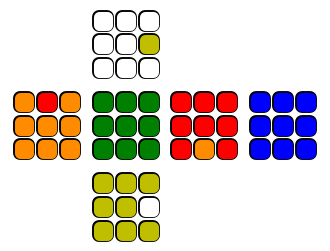

In [12]:
cube = Cube()
cube.apply_moves("U R U2 R' U' R' U' R2 U R")
cube.plot()

In [13]:
# gen states: just do random Us and U-perms, always auf before counting state
uperm = "R U' R U R U R U' R' U' R2"
us = ["","U","U2","U'"]
cube = Cube()
cube.apply_moves("U R U2 R' U' R' U' R2 U R")


states = []
ids = []
for i in range(100): # big number
    if id_from_state(cube.state) not in ids:
        states += [cube.state]
        ids += [id_from_state(cube.state)]
    r = random.randint(0,3)
    ri = (-r)%4
    cube.apply_moves(us[r])
    cube.apply_moves(uperm)
    cube.apply_moves(us[ri])

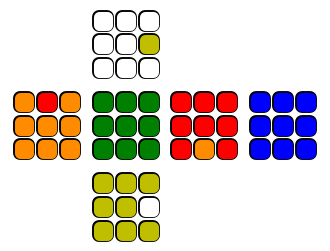

R' U' R2 U R U R U2 R' U'


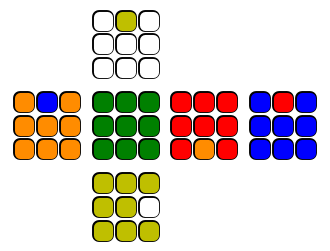

R U R' U' R' U' R' U R U


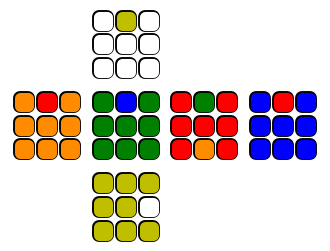

U R U R' U R U' R' U' R' U2 R' U2 R


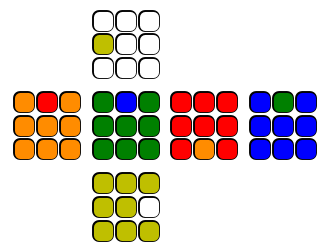

U2 R' U2 R2 U2 R2 U2 R' U2


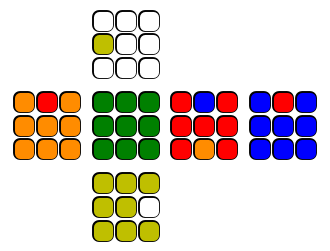

R2 U R' U2 R2 U2 R2 U2 R' U' R2


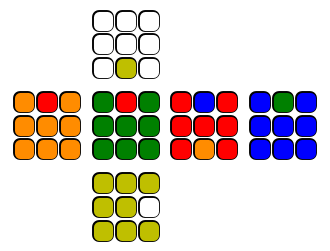

U' R' U' R U' R' U R U R U2 R U2 R'


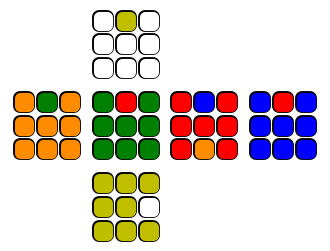

R U2 R2 U' R U R U' R U' R' U'


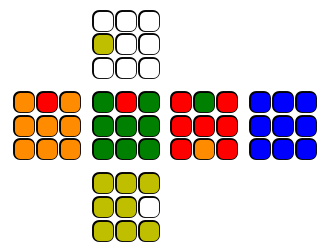

R2 U' R' U2 R2 U2 R2 U2 R' U R2


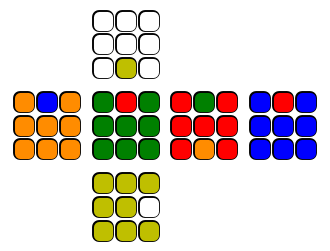

R' U2 R2 U R' U' R' U R' U R U


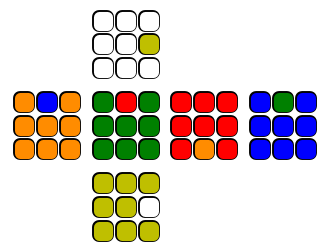

R U R' U R' U' R' U' R2 U2 R U


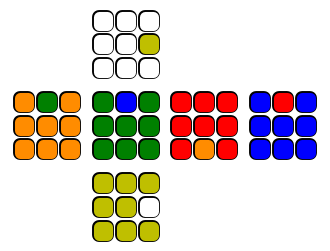

R' U' R U' R U R U R2 U2 R' U'


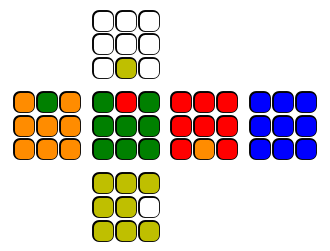

R' U' R U R U R U' R' U'


In [14]:
# gen algs:
# for each state, find optimal solution
cube = Cube()
algs = []
for state in states:
    cube.state = state
    cube.plot()
    alg = solver_2gen(cube)
    print(alg)
    algs.append(alg)


In [15]:
tot = 0
for alg in algs:
    tot += len(alg.split(" "))
print(tot/(len(algs)))

11.416666666666666


In [16]:
for i,alg in enumerate(algs):
    print(i+5,alg)

5 R' U' R2 U R U R U2 R' U'
6 R U R' U' R' U' R' U R U
7 U R U R' U R U' R' U' R' U2 R' U2 R
8 U2 R' U2 R2 U2 R2 U2 R' U2
9 R2 U R' U2 R2 U2 R2 U2 R' U' R2
10 U' R' U' R U' R' U R U R U2 R U2 R'
11 R U2 R2 U' R U R U' R U' R' U'
12 R2 U' R' U2 R2 U2 R2 U2 R' U R2
13 R' U2 R2 U R' U' R' U R' U R U
14 R U R' U R' U' R' U' R2 U2 R U
15 R' U' R U' R U R U R2 U2 R' U'
16 R' U' R U R U R U' R' U'


In [17]:
inverse_alg("R U' R U R U R U' R' U' R2")

"R2 U R U R' U' R' U' R' U R'"

In [18]:
0+9*2+3+2

23

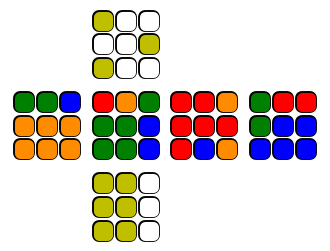

U R2 U' R2 U2 R2 U' R2 U2 R2 U R2 U2 R2


In [19]:
cube = Cube()
cube.apply_moves("R2 U2 R2 U2 R' U2 R U R2 U R2 U' R U R2 U' R2 U R2 U2 R2 U R U R'")
cube.apply_moves("U R2 U' R U' R' U2")
cube.plot()
alg = solver_2gen(cube)
print(alg)

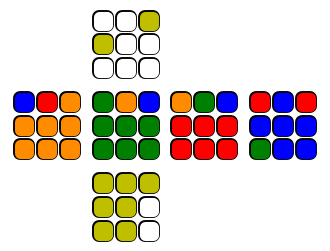

R2 U2 R2 U' R2 U R2 U2 R2 U R2 | 13 + 11 = 24


In [61]:
cube = Cube()
cube.apply_moves("U' R U R' U2 R' U R U R U' R U2 R' U R2 U R' U' R")
start = "R2 U' U R2 U2 R U' R U2 R' U2 R U"
cube.apply_moves(start)
cube.plot()
alg = solver_2gen(cube)
print(alg,"|", len(start.split(" ")),"+", len(alg.split(" ")), "=", len(start.split(" "))+len(alg.split(" ")))